# Генерация новых наблюдений. Класс SMOTE: Synthetic Minority Over-sampling Technique

Случайно выбирается наблюдение. Для него определяются k ближайших. Случайно выбирается одно из них. Новое наблюдение генерируется умножением случайного значения от 0 до 1 на расстояние между каждым признаком этой пары наблюдений. В дальнейшем сгенерированное наблюдение не используется при поиске k ближайших при создании новых наблюдений.

Таким образом можно создавать наблюдения для малых классов балансируя выборку, а также добавлять наблюдения к наибольшему классу, увеличивая общее число наблюдений.

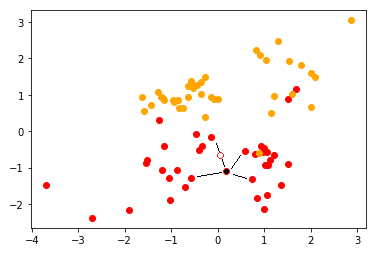


In [9]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

import numpy as np
from matplotlib import pyplot as plt

In [13]:
X, y = datasets.make_classification(n_classes=3, n_informative=5)

In [14]:
class SMOTE:
    def __init__(self, k=4, observations=0):
        self.k = k
        self.ob = observations

    def fit(self, X, y):
        self.X_res = X
        self.y_res = y

    def distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2)**2))

    def transform(self):
        self.classes = np.unique(self.y_res)
        # определение числа наблюдений по каждому классу
        self.counts = [np.where(self.y_res == i)[0].shape[0] for i in self.classes]

        if self.ob == 0:
            self.ob = max(self.counts)

        for ind, c in enumerate(self.classes):
            amount = self.counts[ind]
            
            if amount == self.ob:
                continue

            X_c = self.X_res[self.y_res == c]

            sample_len = self.ob - amount
            sample_ind = [random.randrange(0, amount - 1) for i in range(sample_len)]

            # продолжаем генерировать наблюдения до заданного количества
            while amount < self.ob:

                for ind in sample_ind:
                    x_parent = X_c[ind] # здесь будут исходные наблюдения
                    x_new = [] # здесь будут новые наблюдения

                    # находим k ближайших
                    distances = [self.distance(x_parent, x) for x in X_c]
                    k_nearest = np.argsort(distances)[1:self.k + 1]
                    
                    # выбираем случайное из них
                    x_random = X_c[random.choice(k_nearest)]
                    # умножаем расстояние между ними на случайное значение
                    delta = np.abs(x_parent - x_random) * random.random()

                    # полученное растояние конвертируем в признак
                    for x_p, x_r, dlt in zip(x_parent, x_random, delta):
                        x_new.append(min(x_p, x_r) + dlt)
                    
                    x_new = np.array([x_new])
                    
                    # добавляем сгенерированное наблюдение
                    self.X_res = np.concatenate((self.X_res, x_new), axis=0)
                    self.y_res = np.append(self.y_res, c)

                    amount += 1

        return self.X_res, self.y_res

In [15]:
def plot_classes(y):
    data = {
        'налево': len(y[y == 1]),
        'прямо': len(y[y == 2]),
        'направо': len(y[y == 3])
    }

    fig, ax = plt.subplots()
    names = list(data.keys())
    values = list(data.values())

    ax.bar(names, values)
    plt.show()

method = "(начальный дисбаланс)"
    
# считываем разметку
X = np.array(pd.read_pickle("objects.pcl"))[:-1]
y = np.array(pd.read_pickle("targets.pcl")[0])[1:]

# удаляем повторяющиеся наблюдения
_, indexes = np.unique(X, axis=0, return_index=True)
X = X[indexes, :]
y = y[indexes]

# количество наблюдений и признаков
print("наблюдений:", X.shape[0], ", признаков:", X.shape[1])

X_res, y_res = X, y
plot_classes(y_res)

NameError: name 'pd' is not defined

In [3]:
%%time
# добавить наблюдений до
observations = 1000
method = "SMOTE"

# по ближайшим k соседям
res = SMOTE(k=3, observations=observations)
res.fit(X, y)

X_res, y_res = res.transform()

print("SMOTE, добавлено наблюдений по каждому классу до:", observations)
plot_classes(y_res)
print("*** Результат скользящего контроля ***")
print("\nДоли верных ответов:", cv)
print("Среднее: %0.2f" % cv.mean())

NameError: name 'X' is not defined